In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Pengunjung_Mall.csv')
data.head(10)

,ID_Pelanggan,Gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD
0,1,Pria,19,15,39
1,2,Pria,21,15,81
2,3,Wanita,20,16,6
3,4,Wanita,23,16,77
4,5,Wanita,31,17,40
5,6,Wanita,22,17,76
6,7,Wanita,35,18,6
7,8,Wanita,23,18,94
8,9,Pria,64,19,3
9,10,Wanita,30,19,72


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID_Pelanggan                   200 non-null    int64 
 1   Gender                         200 non-null    object
 2   Usia                           200 non-null    int64 
 3   Pendapatan_Tahunan_Ribuan_USD  200 non-null    int64 
 4   Pengeluaran_USD                200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,ID_Pelanggan,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

ID_Pelanggan                     0
Gender                           0
Usia                             0
Pendapatan_Tahunan_Ribuan_USD    0
Pengeluaran_USD                  0
dtype: int64

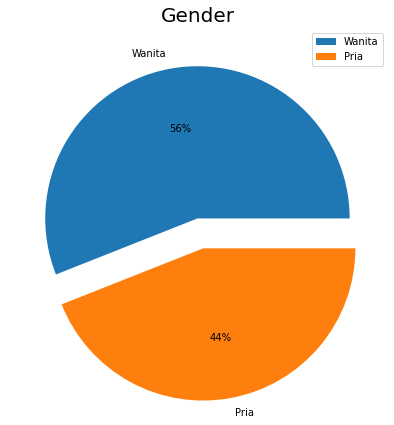

In [7]:
labels = ['Wanita','Pria']
size = data ['Gender'].value_counts()
explode = [0,0.2]
plt.rcParams['figure.figsize']=(7,7)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.F%%')
plt.title ('Gender', fontsize = 20)
plt.axis ('off')
plt.legend()
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


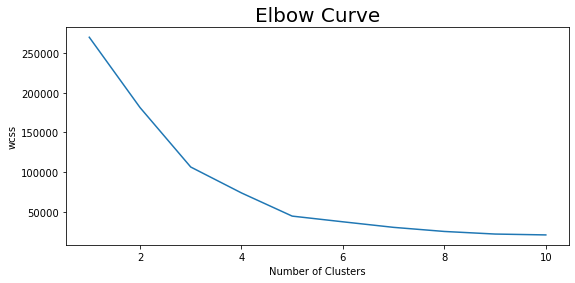

In [8]:
x = data.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (9,4)
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

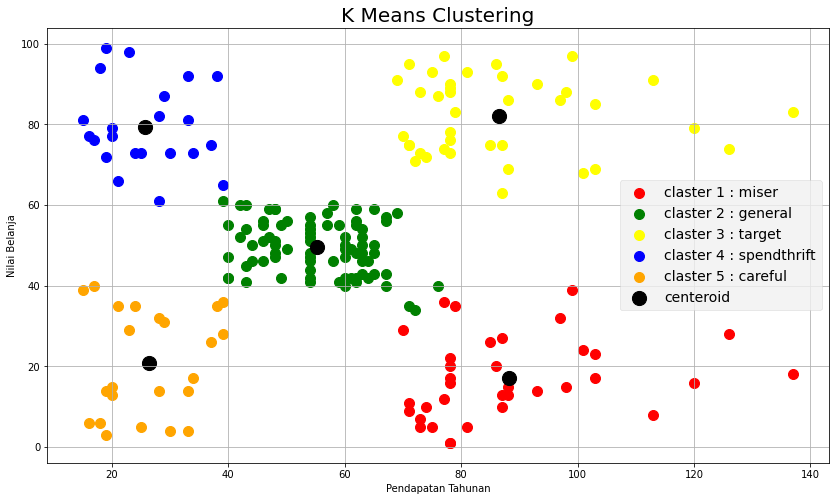

In [9]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
plt.rcParams['figure.figsize'] = (14, 8)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'claster 1 : miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'green', label = 'claster 2 : general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'yellow', label = 'claster 3 : target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'blue', label = 'claster 4 : spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'claster 5 : careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'black' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Nilai Belanja')
plt.legend()
plt.grid()
plt.show()